In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt

In [41]:
import random
import numpy as np
import torch

# PPO2

### Initialize

In [103]:
import gymnasium as gym
from utils.replay_buffer import ReplayBuffer
from torch import nn
from policies.ppo_minibatch import PPO
env = gym.make("CartPole-v1", max_episode_steps=200)
env.reset(seed=0)


(array([ 0.01369617, -0.02302133, -0.04590265, -0.04834723], dtype=float32),
 {})

In [104]:
actor_module = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(inplace=True),
    nn.Linear(128, 2), nn.Softmax()
)
critic_module = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(inplace=True),
    nn.Linear(128, 1)
)
ppo_policy = PPO(
    actor_module,
    critic_module,
    None, None
)
results_ppo = []

### Compute

In [105]:
observation, info = env.reset(seed=0)
total_return = 0
epi_len = 0

for epi in range(200):
    states, rewards, actions, next_states, terminations = [], [], [], [], []
    # while not terminated and not truncated:
    for timestep in range(128):
        action = ppo_policy(observation)
        prev_obs = observation
        observation, reward, terminated, truncated, info = env.step(action)

        states.append(prev_obs)
        rewards.append(reward)
        actions.append(action)
        next_states.append(observation)
        terminations.append(terminated)
        
        total_return += reward
        epi_len += 1
        if terminated or truncated:
            print("len: {}; return: {}".format(epi_len, total_return))
            results_ppo.append((epi_len, total_return))
            total_return = 0
            epi_len = 0
            env.reset()

    print("update")
    ppo_policy.learn(
        torch.from_numpy(np.array(states, copy=False)),
        torch.from_numpy(np.array(actions, copy=False)),
        torch.from_numpy(np.array(next_states, copy=False)),
        torch.from_numpy(np.array(rewards, copy=False)),
        torch.from_numpy(np.array(terminations, copy=False))
    )
    
    
env.close()


len: 18; return: 18.0
len: 17; return: 17.0
len: 18; return: 18.0
len: 14; return: 14.0
len: 30; return: 30.0
update
len: 68; return: 68.0
len: 28; return: 28.0
len: 34; return: 34.0
len: 11; return: 11.0
update
len: 33; return: 33.0
len: 26; return: 26.0
len: 21; return: 21.0
len: 29; return: 29.0
len: 13; return: 13.0
len: 23; return: 23.0
update
len: 10; return: 10.0
len: 65; return: 65.0
len: 18; return: 18.0
update
len: 47; return: 47.0
len: 15; return: 15.0
len: 17; return: 17.0
len: 9; return: 9.0
len: 12; return: 12.0
len: 8; return: 8.0
len: 15; return: 15.0
update
len: 53; return: 53.0
len: 16; return: 16.0
len: 11; return: 11.0
len: 27; return: 27.0
len: 41; return: 41.0
len: 20; return: 20.0
update
len: 11; return: 11.0
len: 18; return: 18.0
len: 25; return: 25.0
len: 12; return: 12.0
len: 25; return: 25.0
len: 33; return: 33.0
update
len: 24; return: 24.0
len: 38; return: 38.0
len: 12; return: 12.0
len: 40; return: 40.0
update
len: 54; return: 54.0
len: 17; return: 17.0
le

Text(0, 0.5, 'Reward')

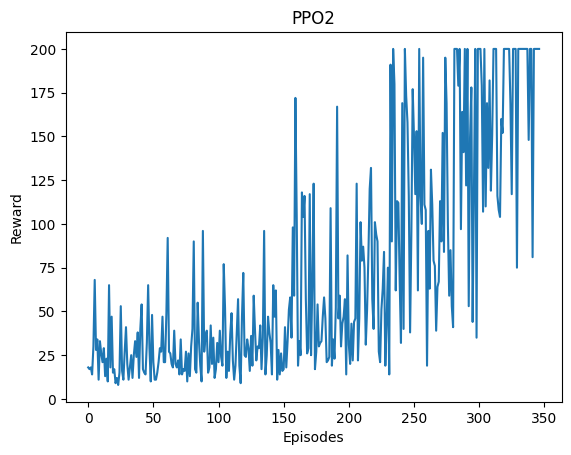

In [106]:
plt.plot([p[0] for p in results_ppo])
plt.title("PPO2")
plt.xlabel("Episodes")
plt.ylabel("Reward")

# Standard PPO

In [107]:
actor_module = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(inplace=True),
    nn.Linear(128, 2), nn.Softmax()
)
critic_module = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(inplace=True),
    nn.Linear(128, 1)
)
ppo_policy = PPO(
    actor_module,
    critic_module,
    None, None
)
results_ppo = []

In [108]:
for epi in range(500):
    observation, info = env.reset(seed=0)
    terminated = False
    truncated = False
    epi_len = 0
    total_return = 0

    states, rewards, actions, next_states, terminations = [], [], [], [], []
    while not terminated and not truncated:
        action = ppo_policy(observation)
        prev_obs = observation
        observation, reward, terminated, truncated, info = env.step(action)

        states.append(prev_obs)
        rewards.append(reward)
        actions.append(action)
        next_states.append(observation)
        terminations.append(terminated)
        
        epi_len += 1
        total_return += reward

    ppo_policy.learn(
        torch.from_numpy(np.array(states, copy=False)),
        torch.from_numpy(np.array(actions, copy=False)),
        torch.from_numpy(np.array(next_states, copy=False)),
        torch.from_numpy(np.array(rewards, copy=False)),
        torch.from_numpy(np.array(terminations, copy=False))
    )
    
    print("epi: {}; len: {}; return: {}".format(epi, epi_len, total_return))
    results_ppo.append((epi_len, total_return))
env.close()


epi: 0; len: 11; return: 11.0
epi: 1; len: 12; return: 12.0
epi: 2; len: 15; return: 15.0
epi: 3; len: 9; return: 9.0
epi: 4; len: 25; return: 25.0
epi: 5; len: 16; return: 16.0
epi: 6; len: 38; return: 38.0
epi: 7; len: 11; return: 11.0
epi: 8; len: 18; return: 18.0
epi: 9; len: 15; return: 15.0
epi: 10; len: 12; return: 12.0
epi: 11; len: 9; return: 9.0
epi: 12; len: 25; return: 25.0
epi: 13; len: 30; return: 30.0
epi: 14; len: 25; return: 25.0
epi: 15; len: 9; return: 9.0
epi: 16; len: 9; return: 9.0
epi: 17; len: 36; return: 36.0
epi: 18; len: 13; return: 13.0
epi: 19; len: 57; return: 57.0
epi: 20; len: 21; return: 21.0
epi: 21; len: 19; return: 19.0
epi: 22; len: 31; return: 31.0
epi: 23; len: 13; return: 13.0
epi: 24; len: 21; return: 21.0
epi: 25; len: 13; return: 13.0
epi: 26; len: 40; return: 40.0
epi: 27; len: 41; return: 41.0
epi: 28; len: 13; return: 13.0
epi: 29; len: 29; return: 29.0
epi: 30; len: 14; return: 14.0
epi: 31; len: 14; return: 14.0
epi: 32; len: 28; return: 

Text(0, 0.5, 'Reward')

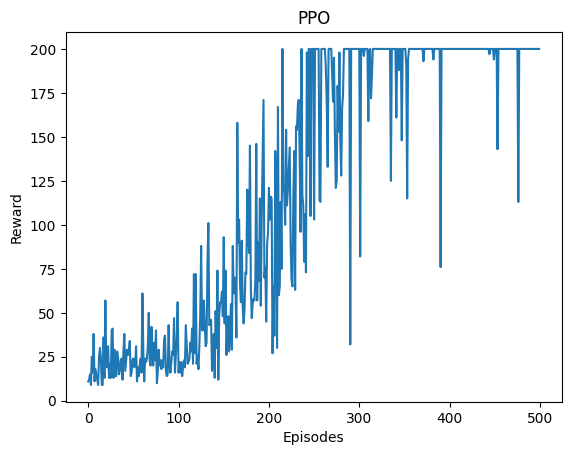

In [109]:
plt.plot([p[0] for p in results_ppo])
plt.title("PPO")
plt.xlabel("Episodes")
plt.ylabel("Reward")